This lab demonstrates how to use linear regression to draw a straight line that best fits a dataset and how to calculate the coefficients, residual sum of squares, and coefficient of determination. We will be using the scikit-learn library to perform linear regression on the diabetes dataset.

## Load the Diabetes Dataset
We start by loading the diabetes dataset from scikit-learn and only selecting one feature from the dataset.
<br>
- 使用 `load_diabetes()` 載入 scikit-learn 內建的糖尿病資料集。
- 資料集中包含 10 個特徵（如 BMI、年齡等）。
- 我們只選取第 3 個特徵（索引 2）來進行單變數線性回歸。

In [1]:
import numpy as np
from sklearn import datasets

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

## Split the Dataset
Next, we split the dataset into training and testing sets. We will use 80% of the data for training and 20% for testing.
<br>
- 將資料集分為：
  - 訓練集（前 422 筆）
  - 測試集（後 20 筆）

In [2]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

## Train the Model
Now, we create a linear regression object and train the model using the training sets.
<br>
- 建立 `LinearRegression` 物件。
- 使用 `.fit(X_train, y_train)` 方法進行模型訓練。<br><br>
模型會自動學習「特徵與目標之間的線性關係」，產生一條最佳直線。

In [3]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

## Make Predictions
We can now use the trained model to make predictions on the testing set.
<br>
- 使用 `.predict(X_test)` 方法，針對測試資料進行預測。
- 這一步讓我們可以比較模型預測值與實際值的誤差。

In [4]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

## Calculate Metrics
We can calculate the coefficients, mean squared error, and coefficient of determination.<br>
- **係數（Coefficient）**：斜率，表示特徵每增加一單位，目標變數平均變化多少。
- **均方誤差（Mean Squared Error, MSE）**：數值越小代表模型預測誤差越低。
- **決定係數（R² score）**：1 表示完美預測，0 表示毫無解釋能力。

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


## Visualize the Results
Finally, we can plot the predicted values against the actual values to visualize how well the model fits the data.
<br>
- 使用 `matplotlib` 畫出：
  - 黑色點：實際測試資料點（x=特徵值，y=實際值）
  - 藍色線：模型預測出的回歸線

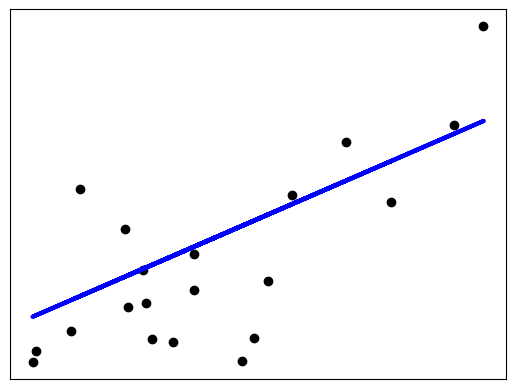

In [7]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Summary
- In this lab, we learned how to use linear regression to fit a straight line to a dataset and how to calculate the coefficients, residual sum of squares, and coefficient of determination.
- We also learned how to visualize the predicted values against the actual values using a scatter plot.

## 實際應用場景
- 預測身體質量指數（BMI）對疾病進展的影響
- 根據單一變數估計成本、利潤、時間等連續值
- 做為多變數模型的簡化版與起點，驗證基本假設

## 模型評估摘要

### Coefficients
斜率，表示特徵與目標變數的線性關係
### Mean Squared Error
平方誤差平均值，數值越低代表預測越準
### Coefficient of Determination (R²)
模型的解釋能力，越接近 1 越好 